# Hyperparametr Tuning
- to choose a set of optimal hyperparameters for a learning algorithm
- example case: Bike Renting Analysis problem (from kaggle)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
%matplotlib inline

In [2]:
!curl -L https://goo.gl/s8qSL5  -o ./bike_train.csv
# !curl https://goo.gl/s8qSL5  -o ../Lab_M2/data/bike_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   122    0   122    0     0    301      0 --:--:-- --:--:-- --:--:--   301
100   340  100   340    0     0    435      0 --:--:-- --:--:-- --:--:--     0
100  643k  100  643k    0     0   539k      0  0:00:01  0:00:01 --:--:--  539k


In [3]:
train = pd.read_csv("bike_train.csv")
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


## Data read and Preprocessing

In [5]:
train = pd.read_csv("bike_train.csv", parse_dates=["datetime"])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
train.shape     # (10886, 12)

(10886, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- decompose 'datetime' feature

In [8]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

In [9]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek   # monday(0), ... sunday(6)

In [10]:
train[["datetime", "d-year", "d-month", "d-day", "d-hour", 
       "d-minute", "d-second", "d-dayofweek"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second,d-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


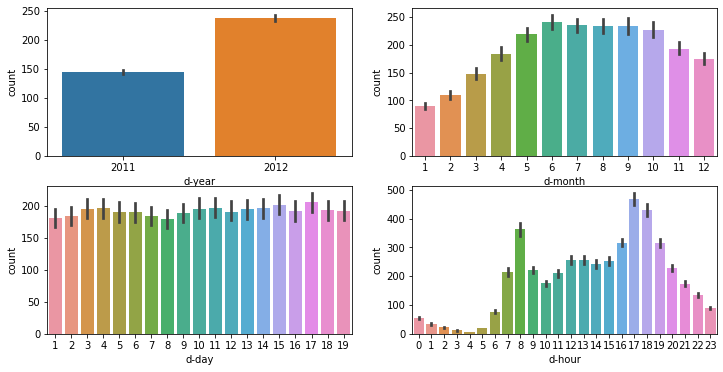

In [11]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

## Data Analysis

#### average numbers of rentals by hour (weekdays and weekends)
- pointplot():point estimates and confidence intervals using scatter plot
- It is important to keep in mind that a point plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

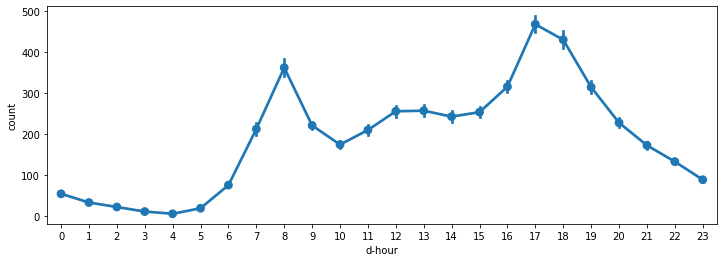

In [12]:
plt.figure(figsize=(12,4))
# sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")
sns.pointplot(data=train, x="d-hour", y="count")

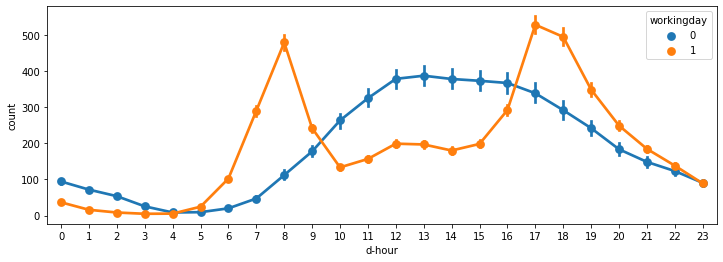

In [ ]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

#### average number of rentals (weekdays)
- dayofweek: return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. This method is available on both Series with datetime values (using the dt accessor) or DatetimeIndex.

In [ ]:
print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


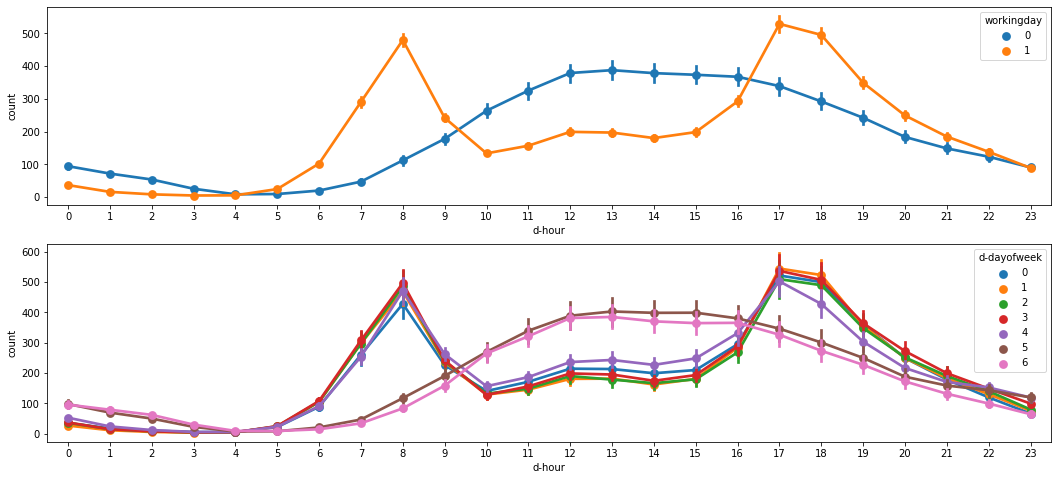

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

#### generating a new feature by combining year and month

In [14]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["d-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "d-year_month"]].head()

(10886, 20)


,datetime,d-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


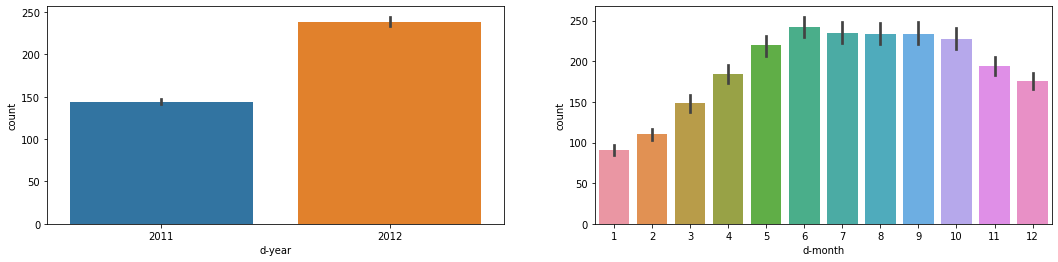

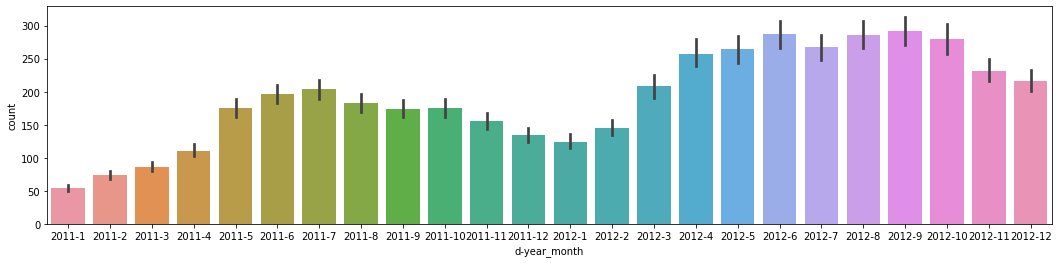

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year_month", y="count", ax=ax3)

## select features to use for training

In [16]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-minute', 'd-second',
       'd-dayofweek', 'd-year_month'],
      dtype='object')

In [17]:
features = ["season", "holiday", "workingday", "weather",
            "temp", "atemp", "humidity", "windspeed",
            "d-year", "d-hour", "d-dayofweek"]

In [18]:
X = train[features]
y = train['count']
print(X.shape, y.shape)
X.head()

(10886, 11) (10886,)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


## A simple prediction model

In [19]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.950037374424954

In [ ]:
# list(zip(y_test, model.predict(X_test)))[:10]

In [20]:
from sklearn.metrics import mean_squared_error
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, np.log(1+y), test_size = 0.2)   # y -> log(1 + y)

model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
print("score: ", model.score(X_test, y_test))
print("MSE: ", mean_squared_error(y_test, model.predict(X_test)))

score:  0.9589512362925672
MSE:  0.08181632076872784


- we can see that log(1+y) gives better performance than y.

In [ ]:
# list(zip(y_test, model.predict(X_test)))[:10]
# X_train[:5]

## other models: linear and decision tree models

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.4725950198506089
0.9131469146693382


#### change the performance score (rmse --> rmsle)
- robust to outliers
- RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.
- This is especially useful for business cases where the underestimation of the target variable is not acceptable but overestimation can be tolerated.
- to be used in GridSearch() (The less, the better.)
- $$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [22]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    predict = np.log(predict + 1)
    actual = np.log(actual + 1)
    
    difference_square_mean = np.square(predict - actual).mean()
    score = np.sqrt(difference_square_mean)
    return score

rmsle_scorer = make_scorer(rmsle)    #  make your own scoring function
rmsle_scorer

make_scorer(rmsle)

## selecting hyperparameters
- Grid search
- Random search

##### Grid search

In [ ]:
# Grid Search for the random forest

n_estimators = 30

max_depth_list = [10, 20, 30, 50, 100]
max_features_list = [0.1, 0.3, 0.5, 0.7,  0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=5,
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 0.16752
Score = 0.12227
Score = 0.09980
Score = 0.09288
Score = 0.09019
Score = 0.14041
Score = 0.10686
Score = 0.09097
Score = 0.08732
Score = 0.08672
Score = 0.14100
Score = 0.10686
Score = 0.09046
Score = 0.08725
Score = 0.08651
Score = 0.14104
Score = 0.10684
Score = 0.09044
Score = 0.08725
Score = 0.08656
Score = 0.14104
Score = 0.10684
Score = 0.09044
Score = 0.08725
Score = 0.08656


[{'score': 0.16752213706297914,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.1},
 {'score': 0.1222683823400239,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.3},
 {'score': 0.0998016022645835,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.5},
 {'score': 0.09287594214081114,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.7},
 {'score': 0.09019356796592827,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.9},
 {'score': 0.14040934212558126,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.1},
 {'score': 0.10685971177775211,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.3},
 {'score': 0.09096907220119907,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.5},
 {'score': 0.08731831033771206,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.7},
 {'score': 0.08672186897236303,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.9},
 {'score': 0.14100416454790904,


In [ ]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)  # make dataframe from dictionary
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(25, 4)


,score,n_estimators,max_depth,max_features
14,0.086512,30,30,0.9
24,0.086562,30,100,0.9
19,0.086562,30,50,0.9
9,0.086722,30,20,0.9
23,0.087247,30,100,0.7


##### Random search
- 2 stages: random selection and fine tuning

In [ ]:
# Random selection

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.08650
Score = 0.08919
Score = 0.09731
Score = 0.08919
Score = 0.08654
Score = 0.08653
Score = 0.09067
Score = 0.08919
Score = 0.08919
Score = 0.12914
(10, 4)


,score,n_estimators,max_depth,max_features
0,0.086496,30,26,0.908559
5,0.086533,30,79,0.981396
4,0.086537,30,91,0.904707
1,0.089189,30,84,0.577577
3,0.089189,30,64,0.564408


In [ ]:
X_train.shape

(8708, 11)

In [ ]:
# fine search

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=30, high=90)
    max_features = np.random.uniform(low=0.5, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list

Score = 0.09067
Score = 0.08631
Score = 0.08653


In [ ]:
# final selection of hyperparameters (최종모델 선택)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              max_depth=65,
                              max_features=0.9309,
                              random_state=37,
                              n_jobs=-1)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()
print("Score = {0:.5f}".format(score))

Score = 0.08487


#### Most significant features

In [ ]:
model.feature_importances_    # he higher, the more important the feature.

array([0.02913502, 0.00160087, 0.03765889, 0.01081639, 0.04810015,
       0.03062739, 0.02133846, 0.01115987, 0.03022727, 0.75079063,
       0.02854507])

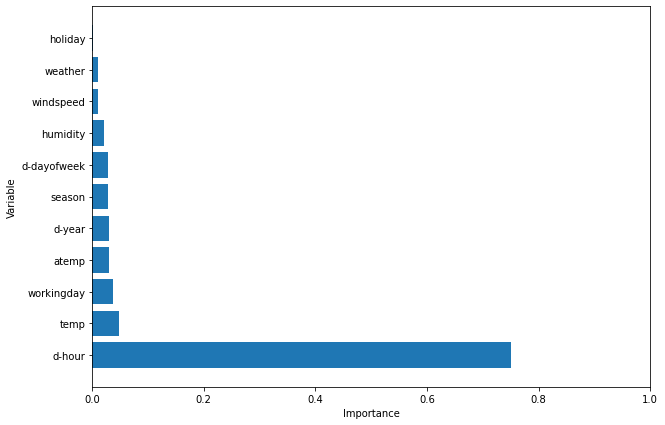

In [ ]:
df = pd.DataFrame({'feature':features,'importance':model.feature_importances_ }) 
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

In [ ]:
## GridSearchCV() function

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 11) (2178, 11) (8708,) (2178,)


In [ ]:
rcf = RandomForestRegressor(n_estimators=100)
rcf.fit(X_train, y_train)
rcf.score(X_test, y_test)

0.9589294043736727

# GridSearchCV()
- 그리드 탐색을 하며 동시에 교차 검증 수행
- fit, model, score 함수를 제공하며 fit 를 호출할 때 여러 파라미터 조합에 대해 교차 검증을 수행
- Exhaustive search over specified parameter values for an estimator.
- it implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, 
 “transform” and “inverse_transform” if they are implemented in the estimator used.
- The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
- 그리드 탐색과 교차 검증을 동시에 수행

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[10, 20, 30], 
           "max_features":[0.3, 0.5, 0.9]}]

# grid search
clf = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)
print("best values: ", clf.best_estimator_)
print("best score: ", clf.best_score_)

# final evaluation on test data
score = clf.score(X_test, y_test)
print("final score: ", score)

best values:  RandomForestRegressor(max_depth=30, max_features=0.9)
best score:  0.9464801835827675
final score:  0.9590798119239151


# RandomizedSearchCV() function
- In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number 
of parameter settings is sampled from the specified distributions. The number of parameter settings
that are tried is given by n_iter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']  # log2
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomizedSearchCV(RandomForestRegressor(), random_grid, 
                               cv = 3, n_jobs = -1) # n_iter default 10
# Fit the random search model
rf.fit(X_train, y_train)

print(rf.best_params_, rf.best_estimator_, rf.best_score_)
score = rf.score(X_test, y_test)
print(score)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True} RandomForestRegressor(max_depth=100, min_samples_leaf=2, n_estimators=600) 0.9465479780903824
0.9591829180036772
